In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df=pd.read_csv('Crop_recommendation.csv')

In [82]:
df.head()

Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     rainfall label  Unnamed: 8  Unnamed: 9  
0  202.935536  rice         NaN         NaN  
1  226.655537  rice         NaN         NaN  
2  263.964248  rice         NaN         NaN  
3  242.864034  rice         NaN         NaN  
4  262.717340  rice         NaN         NaN

In [83]:
df.shape

(2200, 10)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 172.0+ KB


In [85]:
df.drop(columns=['Unnamed: 8','Unnamed: 9'],inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [87]:
df.describe()

Nitrogen   phosphorus    potassium  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [88]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [89]:
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [90]:
target=df.label
df.drop(columns=['label'],inplace=True)

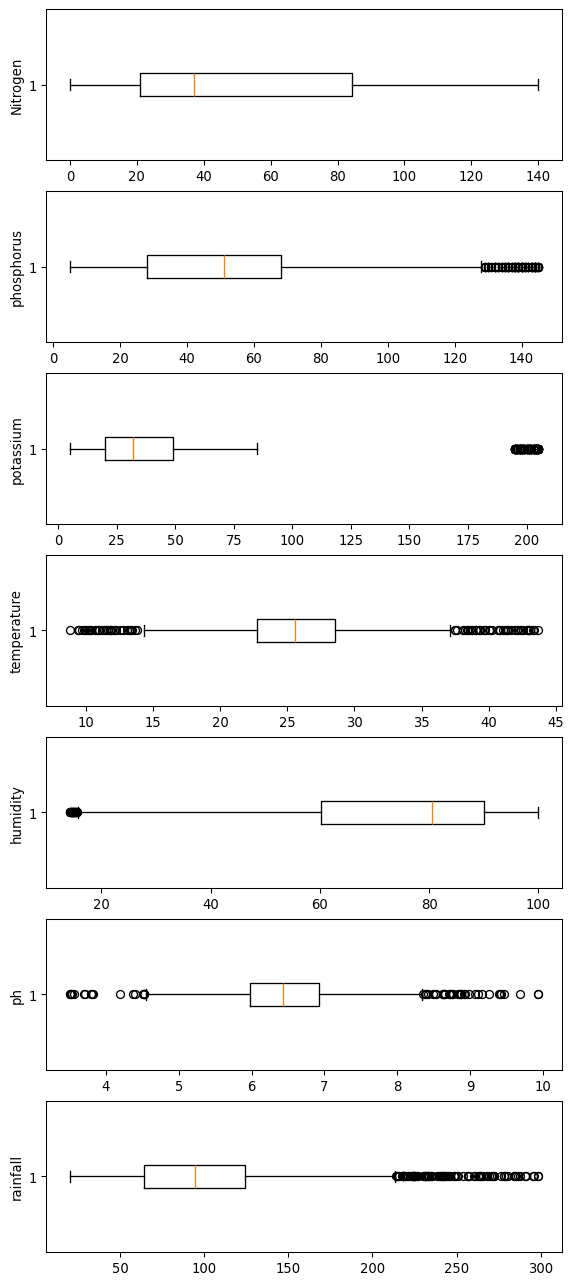

In [91]:
fig, axs = plt.subplots(7,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
	axs[i].boxplot(df[col], vert=False)
	axs[i].set_ylabel(col)
	i+=1
plt.show()

In [92]:
df['label']=target

In [93]:
from scipy.stats import zscore
df['zscore'] = zscore(df['Nitrogen'])
df = df[(df['zscore'] <3)&(df['zscore']>-3)]
df['zscore'] = zscore(df['phosphorus'])
df = df[(df['zscore'] <3)&(df['zscore']>-3)]
df['zscore'] = zscore(df['potassium'])
df = df[(df['zscore'] <3)&(df['zscore']>-3)]
df['zscore'] = zscore(df['temperature'])
df = df[(df['zscore'] <3)&(df['zscore']>-3)]
df['zscore'] = zscore(df['humidity'])
df = df[(df['zscore'] <3)&(df['zscore']>-3)]
df['zscore'] = zscore(df['ph'])
df = df[(df['zscore'] <3)&(df['zscore']>-3)]
df['zscore'] = zscore(df['rainfall'])
df = df[(df['zscore'] <3)&(df['zscore']>-3)]

In [94]:
df.shape

(2030, 9)

In [95]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["crop_name"]=df["label"]
df.label = le.fit_transform(df.label)

In [96]:
df

Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        rainfall  label    zscore crop_name  
0     202.935536     20  1.769153      rice  
1     226.655537     20  2.194801      rice  
2     263.964248     20  2.864293      rice  
3     242.864034     20  2.485657      rice  
4     262.717340     20  2.841918      rice  
...          ...    ...       ...       ...  
2195  177.774507      5  1.317646    coffee  
2196  127.924610      5  0.423106    coffee  
2197  173.322839      5  1.237762    coffee  
2198  127.175293      5  0.409659    coffee  
2199  140.937041      5  0.656610    coffee  

[2030 rows x 10 columns]

In [97]:
map= {label: index for index, label in enumerate(le.classes_)}
map

{'apple': 0,
 'banana': 1,
 'blackgram': 2,
 'chickpea': 3,
 'coconut': 4,
 'coffee': 5,
 'cotton': 6,
 'grapes': 7,
 'jute': 8,
 'kidneybeans': 9,
 'lentil': 10,
 'maize': 11,
 'mango': 12,
 'mothbeans': 13,
 'mungbean': 14,
 'muskmelon': 15,
 'orange': 16,
 'papaya': 17,
 'pigeonpeas': 18,
 'pomegranate': 19,
 'rice': 20,
 'watermelon': 21}

In [98]:
df.sort_values(by="label",ascending=True,inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis = 1,inplace=True)

In [99]:
target=df.label
new_df=df.drop(columns=['zscore','crop_name','label'])

In [100]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2030 non-null   int64  
 1   phosphorus   2030 non-null   int64  
 2   potassium    2030 non-null   int64  
 3   temperature  2030 non-null   float64
 4   humidity     2030 non-null   float64
 5   ph           2030 non-null   float64
 6   rainfall     2030 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 111.1 KB


In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
column={
    'data-columns':[col.lower() for col in new_df.columns]
}

In [103]:
scaler=MinMaxScaler()
new_df=scaler.fit_transform(new_df)

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_df,target,test_size=0.2)

In [105]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [106]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}



In [107]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
grid= pd.DataFrame(scores,columns=['model','best_score','best_params'])
grid


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

model  best_score                    best_params
0                      svm    0.985225  {'C': 20, 'kernel': 'linear'}
1            random_forest    0.990154           {'n_estimators': 10}
2      logistic_regression    0.942727                      {'C': 10}
3     naive_bayes_gaussian    0.994462                             {}
4  naive_bayes_multinomial    0.703821                             {}
5            decision_tree    0.987075       {'criterion': 'entropy'}

In [108]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [109]:
model.score(x_test,y_test)

0.9950738916256158

In [110]:
import pickle
with open('crop_prediction_model.pickle','wb') as f:
    pickle.dump(model,f)

In [111]:
import json
with open("crop_map.json","w") as f:
    f.write(json.dumps(map))
with open("columns.json","w") as f:
    f.write(json.dumps(column))